## Мигуля Максим БПМ181

# Задание 1

In [81]:
import sympy
x = sympy.Symbol('x')
first = float(sympy.integrate(x**25/(x + 0.1), (x, 0, 1)))
second = float(sympy.integrate(x**25/(x + 10), (x, 0, 1)))
print('Интеграл I_25 при a = 0.1:',first)
print('Интеграл I_25 при a = 10:',second)

Интеграл I_25 при a = 0.1: 0.036226970909116835
Интеграл I_25 при a = 10: 0.0035083534096819772


In [82]:
def upwards_recursion(n, a):
    if n == 0:
        return sympy.ln((1 + a) / a)
    return 1/n - a * upwards_recursion(n - 1,a)

In [83]:
print('Интеграл I_25, вычисленный прямой рекурсией, при a = 0.1:',upwards_recursion(25,0.1))
print('Интеграл I_25, вычисленный прямой рекурсией, при a = 10:',upwards_recursion(25,10))

Интеграл I_25, вычисленный прямой рекурсией, при a = 0.1: 0.0362269709091168
Интеграл I_25, вычисленный прямой рекурсией, при a = 10: -748346367.401390


In [84]:
def downwards_recursion(n,a): 
    if n == 50:
        return float(sympy.integrate(x**50/(x + a), (x, 0, 1)))
    x0 = sympy.ln((1+a) / a)
    res = (1/(n + 1) - downwards_recursion(n + 1,a) ) / a
    return res

In [85]:
print('Интеграл I_25, вычисленный обратной рекурсией, при a = 0.1:',downwards_recursion(25,0.1))
print('Интеграл I_25, вычисленный обратной рекурсией, при a = 10:',downwards_recursion(25,10))

Интеграл I_25, вычисленный обратной рекурсией, при a = 0.1: -75445029.6647004
Интеграл I_25, вычисленный обратной рекурсией, при a = 10: 0.0035083534096819772


# Задание 4

In [86]:
import math
def round_to_n(x, n):
    if x == 0:
        return x
    else:
        return round(x, -int(math.floor(math.log10(abs(x)))) + (n - 1))

In [87]:
res=0
for k in range(1, 3001):
    res = round_to_n(res + 1/k**2, 4)
res

1.624

In [88]:
res=0
for k in range(3000, 0, -1):
    res = round_to_n(res + 1/k**2, 4)
res

1.645

# Задание 5

a)

In [147]:
G = 6.67 * 10 ** (-11)

In [148]:
m1 = 40 * 10 ** 4
m2 = 30 * 10 ** 4
r = 3.2
m1_dev = 0.05 * 10 ** 4
m2_dev = 0.1 * 10 ** 4
r_dev = 0.01

In [150]:
dF_m1 = G * m2 * m1_dev / (r**2) 
dF_m2 = G * m1 * m2_dev / (r**2) 
dF_r = -2 * G * m1 * m2 * r_dev / (r**3)
F = G * m1 * m2 / (r**2)
delta_f = dF_m1 + dF_m2 + dF_r
delta_f

-0.0013027343749999996

In [151]:
f_mean = m1 * m2 * G / (r * r)

b)

In [152]:
import random
import numpy as np
M1 = list()
M2 = list()
r = list()
f = list()
for i in range(10 ** 5):
    M1.append(random.normalvariate(40 * 10 ** 4, 0.05 * 10 ** 4))
    M2.append(random.normalvariate(30 * 10 ** 4, 0.1 * 10 ** 4))
    r.append(random.normalvariate(3.2, 0.01))
    f.append(M1[i] * M2[i] * 6.674 * 10 ** (-11) / (r[i] ** 2))

In [153]:
f[2]

0.7967259690911875

c)

In [154]:
import matplotlib.pyplot as plt
import scipy.stats

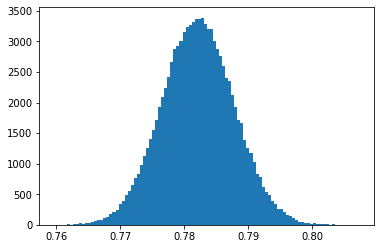

In [155]:
plt.hist(f, bins = 100)
plt.show()

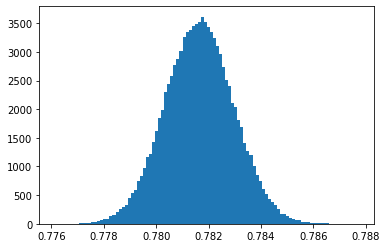

In [156]:
f_final = list()
for i in range(10 ** 5):
    f_final.append(random.normalvariate(f_mean, delta_f))
plt.hist(f_final, bins = 100)
plt.show()

d)

In [157]:
new_m1 = 40 * 10 ** 4
new_m2 = 30 * 10 ** 4
new_r = 3.2
new_m1_dev = 2 * 10 ** 4
new_m2_dev = 10 * 10 ** 4
new_r_dev = 1

In [158]:
new_dF_m1 = G * new_m2 * new_m1_dev / (new_r**2) 
new_dF_m2 = G * new_m1 * new_m2_dev / (new_r**2) 
new_dF_r = -2 * G * new_m1 * new_m2 * new_r_dev / (new_r**3)
new_F = G * new_m1 * new_m2 / (new_r**2)
new_delta_f = new_dF_m1 + new_dF_m2 + new_dF_r
new_delta_f

-0.18889648437499995

In [159]:
new_f_mean = new_m1 * new_m2 * G / (new_r * new_r)

In [160]:
new_M1 = list()
new_M2 = list()
new_r = list()
new_f = list()
for i in range(10 ** 5):
    new_M1.append(random.normalvariate(40 * 10 ** 4, 2 * 10 ** 4))
    new_M2.append(random.normalvariate(30 * 10 ** 4, 10 * 10 ** 4))
    new_r.append(random.normalvariate(3.2, 1))
    new_f.append(new_M1[i] * new_M2[i] * 6.674 * 10 ** (-11) / (new_r[i] ** 2))

In [161]:
new_f = [x for x in new_f if x < 5]

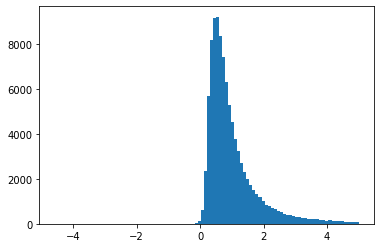

In [162]:
plt.hist(new_f, bins = 100)
plt.show()

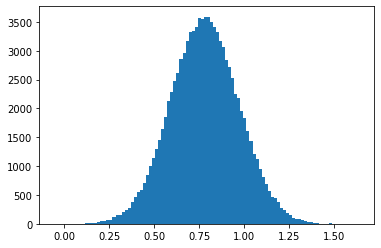

In [163]:
new_f_final = list()
for i in range(10 ** 5):
    new_f_final.append(random.normalvariate(new_f_mean, new_delta_f))
plt.hist(new_f_final, bins = 100)
plt.show()